# Fish market
### Database of common fish species for fish market
This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

Data link : https://www.kaggle.com/aungpyaeap/fish-market

This data has been analysed and modeled by **Md. Mahmudul Hasan Riyad**.



In [1]:
# Calling necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\Riyad\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("F:\\datasets\\Fish data\\fish.csv")

## Exploring Data

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [6]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


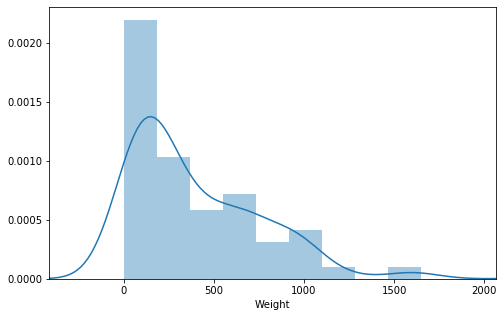

In [7]:
plt.figure(figsize = (8,5))
ax = sns.distplot(data['Weight'], kde = True)
ax.margins(x= 0)


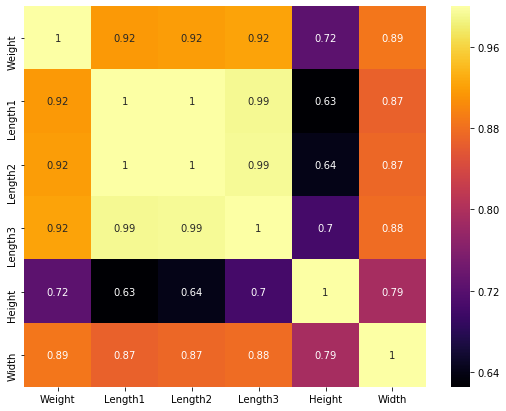

In [8]:
correlation = data.corr()
plt.figure(figsize = (9,7))
sns.heatmap(correlation, cmap = 'inferno', annot = True)

The features in the data is highly correlated to each other

In [9]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
correlation['Weight']

Weight     1.000000
Length1    0.915712
Length2    0.918618
Length3    0.923044
Height     0.724345
Width      0.886507
Name: Weight, dtype: float64

### Scaling the data 

In [11]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data.iloc[:, 1:] = scale.fit_transform(data.iloc[:, 1:])

### Rearranging and Spliting the data into Independent and Dependent features

In [12]:
data = data[['Species','Length1','Length2','Length3','Height','Width','Weight']]
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

### Encoding data

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X= np.array(ct.fit_transform(X))


In [14]:
X

array([[ 1.        ,  0.        ,  0.        , ..., -0.10602023,
         0.59657867, -0.23652895],
       [ 1.        ,  0.        ,  0.        , ..., -0.00233668,
         0.82126055, -0.06657895],
       [ 1.        ,  0.        ,  0.        , ..., -0.01097698,
         0.79734129,  0.16579317],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.50574813,
        -1.56668655, -1.88140219],
       [ 0.        ,  0.        ,  0.        , ..., -1.38478399,
        -1.42724336, -1.39856804],
       [ 0.        ,  0.        ,  0.        , ..., -1.29838103,
        -1.41334117, -1.51043989]])

### Spliting data into training and testing data

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Cross-validation and some fuction

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits= 5, shuffle = False, random_state = 42)

In [17]:
def display_rmse_score(mse):
    rmse = np.sqrt(mse)
    print("MSE_Scores: ", mse)
    print("Mean Squared Error: ", mse.mean())
    print("Root Mean Squared Error: ", rmse.mean())
    print("RMSE Standard Deviation: ", rmse.std() )
def display_mae_score(mae):
    print("MAE_Scores: ", mae)
    print("Mean Absolute Error: ", mae.mean())
    print("MAE Standard Deviation: ", mae.std())

## With Cross-Validation

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_scores_mse = -cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = 5)
lin_scores_mae = -cross_val_score(lin_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = 5)

In [19]:
display_rmse_score(lin_scores_mse)
display_mae_score(lin_scores_mae)

MSE_Scores:  [0.04494472 0.08271634 0.08982744 0.1519829  0.07033374]
Mean Squared Error:  0.08796102822370067
Root Mean Squared Error:  0.2908746760775539
RMSE Standard Deviation:  0.0579046720090764
MAE_Scores:  [0.15217507 0.20148761 0.24692325 0.25196222 0.22311884]
Mean Absolute Error:  0.21513339967430417
MAE Standard Deviation:  0.03627859665705354


## Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = True)
X_poly = poly_features.fit_transform(X_train)

In [21]:
from sklearn.linear_model import LinearRegression
plin_reg = LinearRegression()
plin_scores_mse = -cross_val_score(plin_reg, X_poly, y_train, scoring = "neg_mean_squared_error",cv = 5)
plin_scores_mae = -cross_val_score(plin_reg, X_poly, y_train, scoring = "neg_mean_absolute_error",cv = 5)

In [22]:
display_rmse_score(plin_scores_mse)
display_mae_score(plin_scores_mae)

MSE_Scores:  [0.03747651 0.05629294 0.02771582 0.04171997 0.12792714]
Mean Squared Error:  0.05822647802772431
Root Mean Squared Error:  0.23185085087364174
RMSE Standard Deviation:  0.06687047911367647
MAE_Scores:  [0.11720559 0.15398033 0.09739404 0.13567455 0.21801626]
Mean Absolute Error:  0.14445415546430604
MAE Standard Deviation:  0.041319127961548005


## Support Vector Regression

In [23]:
from sklearn.svm import SVR
svr_reg = SVR(C = 2.0, epsilon = 0.2, gamma='scale')
svr_scores_mse = -cross_val_score(svr_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = 5)
svr_scores_mae = -cross_val_score(svr_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = 5)

In [24]:
display_rmse_score(svr_scores_mse)
display_mae_score(svr_scores_mae)

MSE_Scores:  [0.01766173 0.04010021 0.02646653 0.14017034 0.01764173]
Mean Squared Error:  0.04840810716752071
Root Mean Squared Error:  0.2006097269458338
RMSE Standard Deviation:  0.09035399616087127
MAE_Scores:  [0.11178996 0.15998893 0.11519815 0.21219059 0.10502817]
Mean Absolute Error:  0.1408391580633254
MAE Standard Deviation:  0.040599225997604065


## Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(min_samples_leaf =1, random_state = 42)
tree_scores_mse = -cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = 5)
tree_scores_mae = -cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = 5)

In [26]:
display_rmse_score(tree_scores_mse)
display_mae_score(tree_scores_mae)

MSE_Scores:  [0.01917588 0.05359227 0.02177059 0.07475185 0.02244812]
Mean Squared Error:  0.03834774292991223
Root Mean Squared Error:  0.18815209597235907
RMSE Standard Deviation:  0.05428196487895783
MAE_Scores:  [0.09752333 0.15794505 0.09262134 0.1935113  0.09210571]
Mean Absolute Error:  0.1267413466144231
MAE Standard Deviation:  0.04159180705658289


## Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
rnd_scores_mse = -cross_val_score(rnd_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv = 5)
rnd_scores_mae = -cross_val_score(rnd_reg, X_train, y_train, scoring = "neg_mean_absolute_error",cv = 5)


In [28]:
display_rmse_score(rnd_scores_mse)
display_mae_score(rnd_scores_mae)

MSE_Scores:  [0.01278162 0.03527001 0.02399003 0.09437614 0.01689127]
Mean Squared Error:  0.03666181538991815
Root Mean Squared Error:  0.178583907047616
RMSE Standard Deviation:  0.06906231630583057
MAE_Scores:  [0.0803241  0.12175183 0.09015241 0.19349092 0.09147307]
Mean Absolute Error:  0.11543846422612525
MAE Standard Deviation:  0.0414217028860469


## Impact Learning Regressor

In [38]:
from ImpactLearning import Regressor
il_reg = Regressor()
il_reg.fit(X_train,y_train, X_test, y_test, loss_function="MAE", optimizer = "GD",)
il_reg.train(epochs=4000, lr=0.3, progress_per=500)

Epoch: 500, train_loss: 0.190905, test_loss: 0.204120 
Epoch: 1000, train_loss: 0.184135, test_loss: 0.157931 
Epoch: 1500, train_loss: 0.184050, test_loss: 0.148790 
Epoch: 2000, train_loss: 0.182840, test_loss: 0.176999 
Epoch: 2500, train_loss: 0.180031, test_loss: 0.168124 
Epoch: 3000, train_loss: 0.182906, test_loss: 0.178535 
Epoch: 3500, train_loss: 0.179531, test_loss: 0.167795 
Epoch: 4000, train_loss: 0.185512, test_loss: 0.185153 
Training Completed


In [36]:
from ImpactLearning import Regressor
il_reg = Regressor()
il_reg.fit(X_train,y_train, X_test, y_test, loss_function="MSE", optimizer = "GD",)
il_reg.train(epochs=10000, lr=0.3, progress_per=200)

Epoch: 200, train_loss: 0.084497, test_loss: 0.077493 
Epoch: 400, train_loss: 0.077701, test_loss: 0.066293 
Epoch: 600, train_loss: 0.074738, test_loss: 0.062943 
Epoch: 800, train_loss: 0.073234, test_loss: 0.061870 
Epoch: 1000, train_loss: 0.072464, test_loss: 0.061602 
Epoch: 1200, train_loss: 0.072064, test_loss: 0.061682 
Epoch: 1400, train_loss: 0.071844, test_loss: 0.061900 
Epoch: 1600, train_loss: 0.071711, test_loss: 0.062140 
Epoch: 1800, train_loss: 0.071617, test_loss: 0.062348 
Epoch: 2000, train_loss: 0.071542, test_loss: 0.062509 
Epoch: 2200, train_loss: 0.071476, test_loss: 0.062624 
Epoch: 2400, train_loss: 0.071416, test_loss: 0.062702 
Epoch: 2600, train_loss: 0.071359, test_loss: 0.062751 
Epoch: 2800, train_loss: 0.071304, test_loss: 0.062777 
Epoch: 3000, train_loss: 0.071250, test_loss: 0.062788 
Epoch: 3200, train_loss: 0.071199, test_loss: 0.062786 
Epoch: 3400, train_loss: 0.071149, test_loss: 0.062775 
Epoch: 3600, train_loss: 0.071100, test_loss: 0.0627